<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2024/blob/main/Module_4/16_SOFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for the Fall 2024 Course "Machine Learning for Materials Science"
- Instructor Sergei V. Kalinin

- Let's experiment with self-organized feature maps (SOM)
- Have a look at https://en.wikipedia.org/wiki/Self-organizing_map
- Or ask ChatGPT on basic principles of SOM, learning rule, and outputs
- Note that in essence SOM is a way to approximate the probability distribution of the data using low-D representation. How we use it - fro exploration, clustering, etc. is a different problem.

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=32bf90c429bd724b2360f408199ff1c42059477ff67e0977d2a14d83944403b3
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


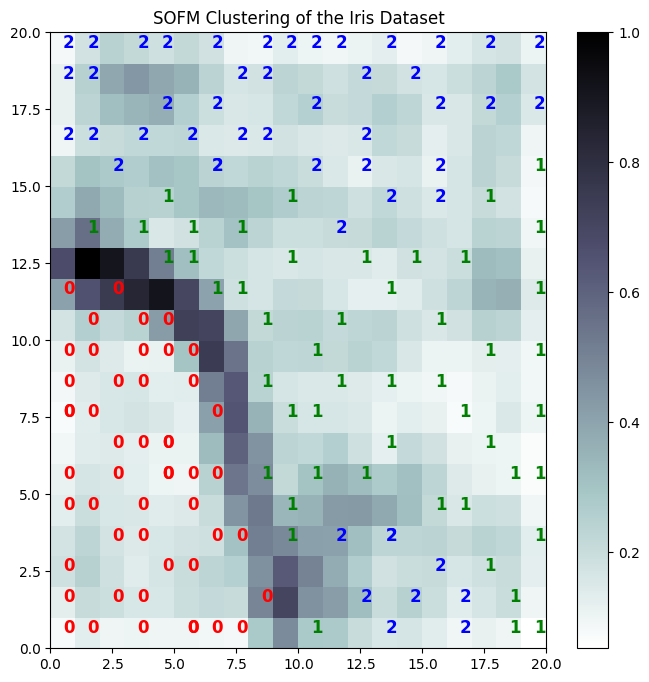

In [2]:
# Importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom  # SOFM library
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data  # Use the features
target = iris.target  # Use the species labels (for visualization purposes)

# Step 2: Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Initialize the SOFM
# We create a 20x20 grid for the SOFM
som = MiniSom(x=20, y=20, input_len=data_scaled.shape[1], sigma=2.0, learning_rate=0.5)
som.random_weights_init(data_scaled)

# Step 4: Train the SOFM
# Note that long training is good
som.train_random(data_scaled, num_iteration=10000)

# Step 5: Visualize the results

# Create a color map based on the target (species labels)
colors = np.array(['r', 'g', 'b'])  # Three classes in Iris dataset

plt.figure(figsize=(8, 8))
# Iterate through the data points and plot them based on the BMU
for i, x in enumerate(data_scaled):
    w = som.winner(x)  # Get the Best Matching Unit (BMU) for the data point
    plt.text(w[0] + 0.5, w[1] + 0.5, str(target[i]), color=colors[target[i]],
             fontdict={'size': 12, 'weight': 'bold'})

# Plot the U-Matrix (distance between neighboring neurons)
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Distance map as a background
plt.colorbar()
plt.title('SOFM Clustering of the Iris Dataset')
plt.show()


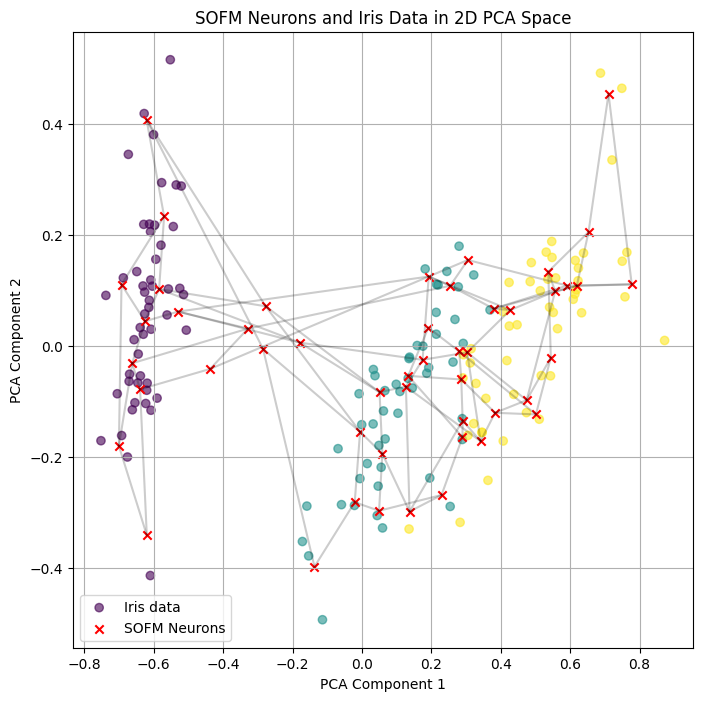

In [3]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data  # Use the features

# Step 2: Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Initialize the SOFM
som = MiniSom(x=7, y=7, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_scaled)

# Step 4: Train the SOFM
som.train_random(data_scaled, num_iteration=10000)

# Step 5: Perform PCA on the original data to reduce it to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 6: Project the weight vectors of the neurons into the PCA space
# Get the weight vectors of the neurons
weights = som.get_weights().reshape(-1, data_scaled.shape[1])  # Flatten the grid
weights_pca = pca.transform(weights)  # Project weights to the PCA space

# Step 7: Visualization

plt.figure(figsize=(8, 8))

# Plot the original data in the PCA space
plt.scatter(data_pca[:, 0], data_pca[:, 1], label='Iris data', c=iris.target, alpha=0.6)

# Plot the SOFM weight vectors in the PCA space
plt.scatter(weights_pca[:, 0], weights_pca[:, 1], label='SOFM Neurons', c='red', marker='x')

# Optionally, plot lines connecting the SOFM neurons to visualize their grid structure
for i in range(weights_pca.shape[0]):
    for j in range(i + 1, weights_pca.shape[0]):
        if np.linalg.norm(np.array([i // 7, i % 7]) - np.array([j // 7, j % 7])) == 1:
            plt.plot([weights_pca[i, 0], weights_pca[j, 0]], [weights_pca[i, 1], weights_pca[j, 1]], 'k-', alpha=0.2)

# Adding plot labels and legends
plt.title('SOFM Neurons and Iris Data in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()

plt.show()

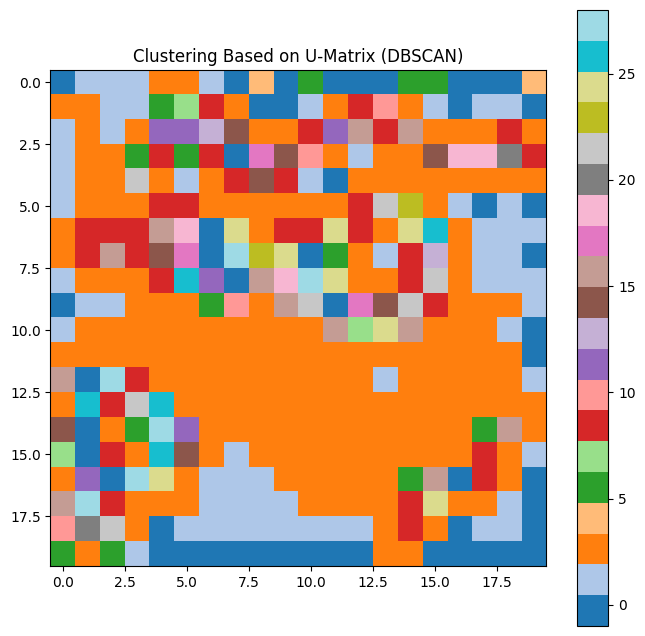

In [4]:
from sklearn.cluster import DBSCAN

# Step 1: Load and preprocess the Iris dataset
iris = load_iris()
data = iris.data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Initialize and train the SOFM
som = MiniSom(x=20, y=20, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, num_iteration=10000)

# Step 3: Get the U-matrix (distance map)
u_matrix = som.distance_map()

# Step 4: Flatten the U-matrix for clustering
u_matrix_flat = u_matrix.reshape(-1, 1)

# Step 5: Apply DBSCAN clustering on the flattened U-matrix
dbscan = DBSCAN(eps=0.005, min_samples=2)  # Set `eps` and `min_samples` based on your distance map characteristics
labels = dbscan.fit_predict(u_matrix_flat)

# Step 6: Visualize the clustering results

# Reshape labels to match the grid
labels_grid = labels.reshape(u_matrix.shape)

plt.figure(figsize=(8, 8))
plt.imshow(labels_grid, cmap='tab20', interpolation='none')
plt.title('Clustering Based on U-Matrix (DBSCAN)')
plt.colorbar()
plt.show()


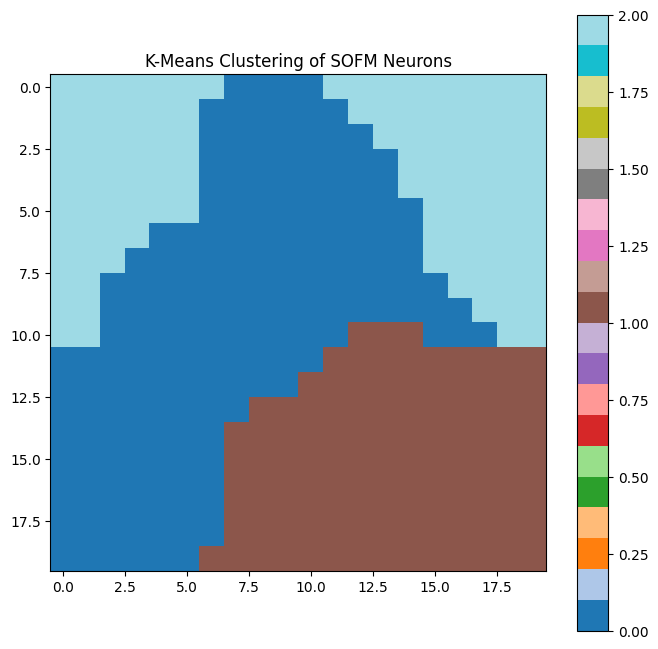

Assigned cluster labels for the Iris dataset:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0]


In [5]:
from sklearn.cluster import KMeans

# Step 1: Load and preprocess the Iris dataset
iris = load_iris()
data = iris.data

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Initialize and train the SOFM
som = MiniSom(x=20, y=20, input_len=data_scaled.shape[1], sigma=2.0, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, num_iteration=10000)

# Step 3: Get the weight vectors of the neurons
weights = som.get_weights().reshape(-1, data_scaled.shape[1])  # Flatten the grid of weight vectors

# Step 4: Apply K-Means clustering on the weight vectors
n_clusters = 3  # Assuming we want to identify 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(weights)

# Step 5: Visualize the cluster assignments on the SOFM grid
labels_grid = labels.reshape((20, 20))  # Reshape the cluster labels back to the 7x7 grid

# Step 6: Plot the clusters on the U-matrix (Distance map)
plt.figure(figsize=(8, 8))
plt.imshow(som.distance_map().T, cmap='bone_r', alpha=0.5)  # Plot the U-Matrix as background
plt.title('K-Means Clustering of SOFM Neurons')
plt.imshow(labels_grid.T, cmap='tab20', interpolation='none')  # Plot the clusters on top
plt.colorbar()
plt.show()

# Step 7: Assign each data point to a cluster
data_cluster_labels = []

for x in data_scaled:
    bmu = som.winner(x)  # Find the Best Matching Unit (BMU)
    cluster_label = labels_grid[bmu[0], bmu[1]]  # Assign the cluster label of the BMU
    data_cluster_labels.append(cluster_label)

# Print out the assigned cluster labels for each data point
print("Assigned cluster labels for the Iris dataset:")
print(data_cluster_labels)


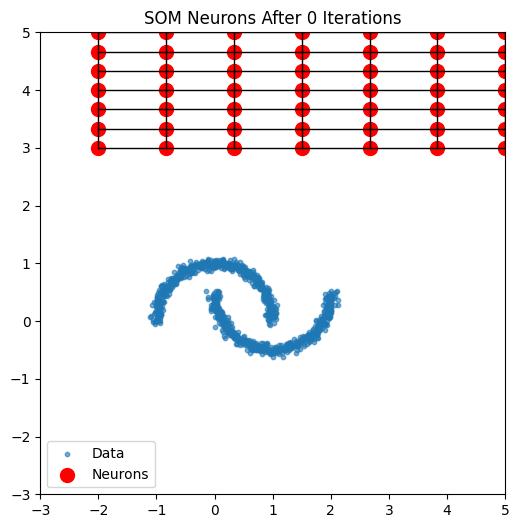

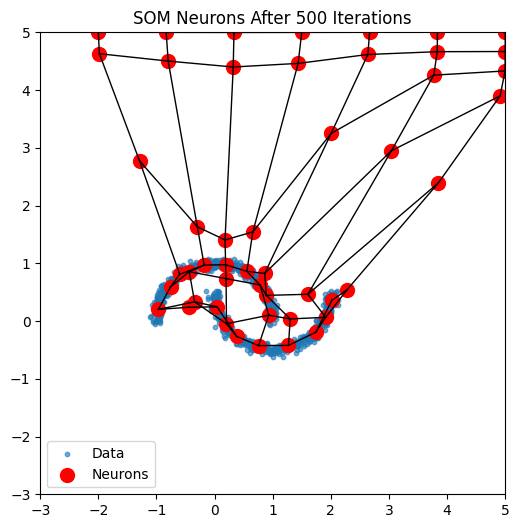

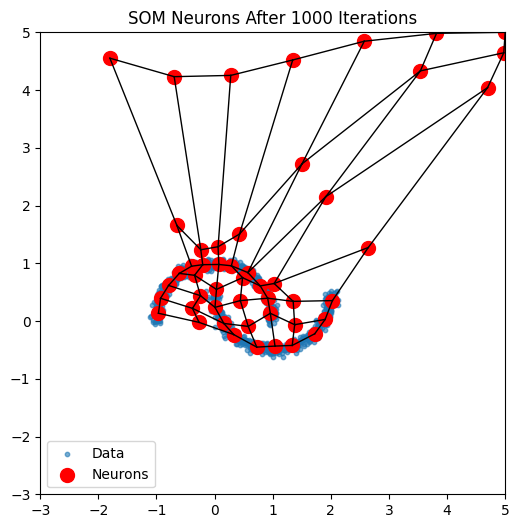

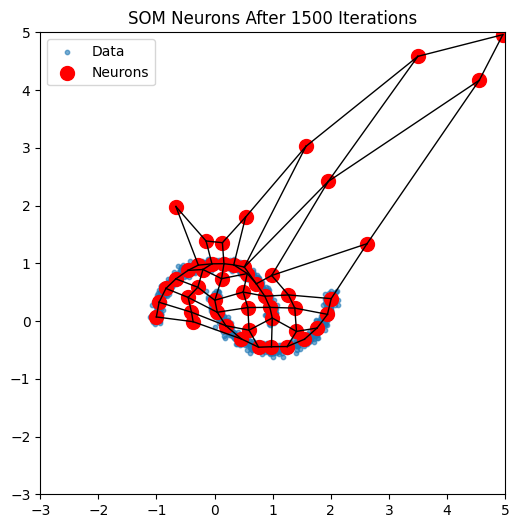

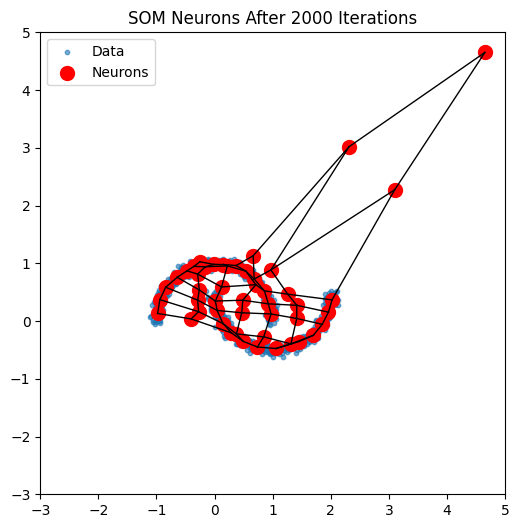

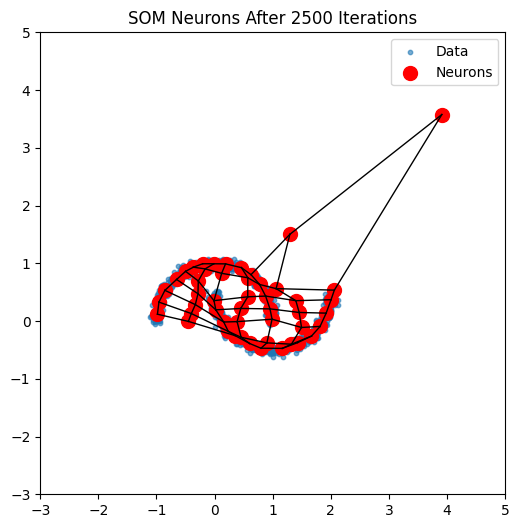

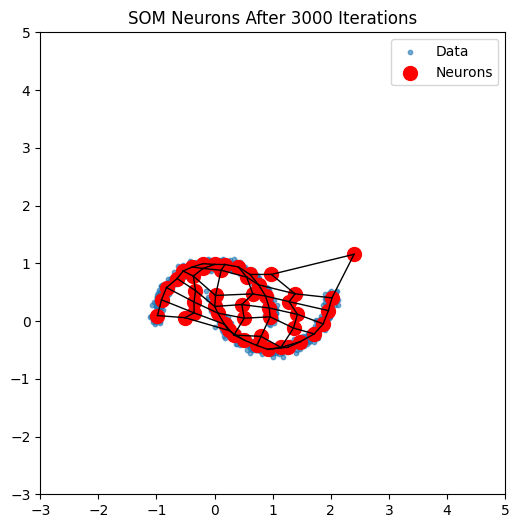

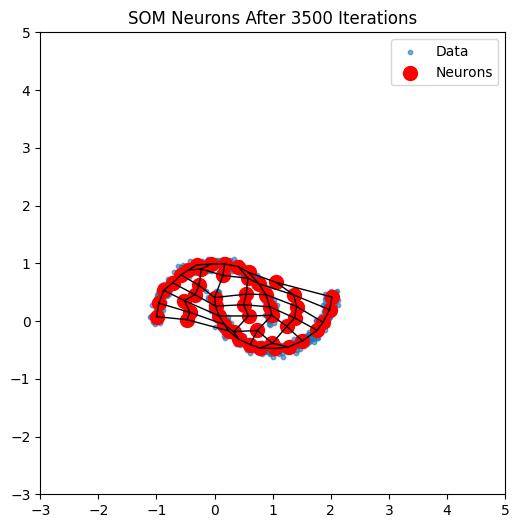

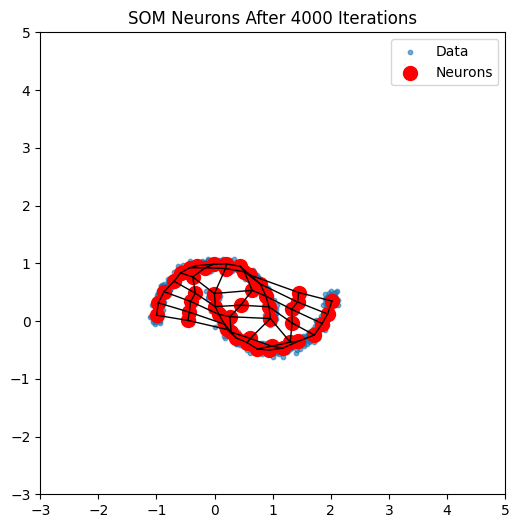

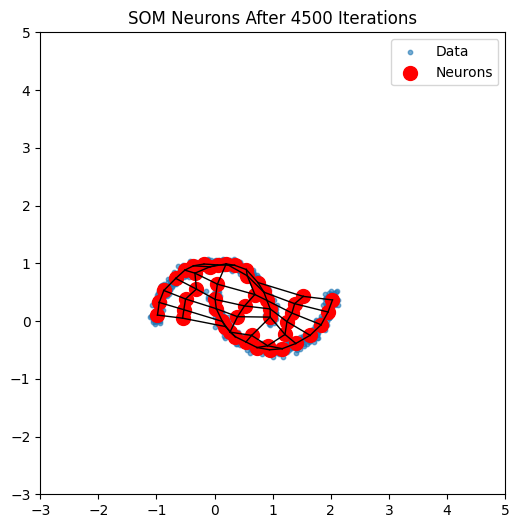

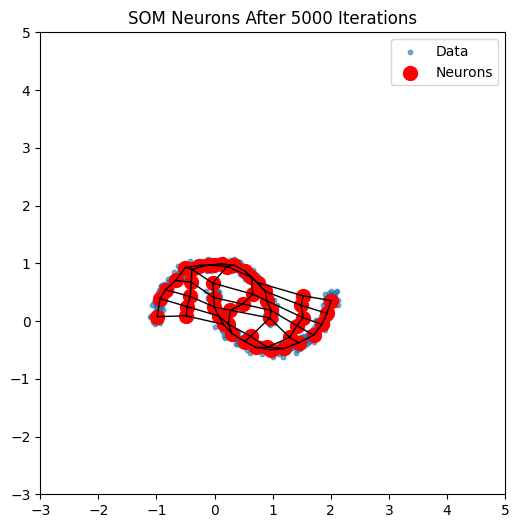

Animated GIF created as 'som_training_animation.gif'


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from minisom import MiniSom
from PIL import Image, ImageDraw

# Step 1: Generate half-moon dataset
np.random.seed(42)
data, _ = make_moons(n_samples=1000, noise=0.05)

# Step 2: Initialize a 7x7 SOM
som_x = 7
som_y = 7
som = MiniSom(x=som_x, y=som_y, input_len=2, sigma=1.0, learning_rate=0.5)

# Initialize the SOM weights manually using equal spacing in a grid away from the data
x_neurons, y_neurons = np.meshgrid(np.linspace(-2, 5, som_x), np.linspace(3, 5, som_y))
initial_weights = np.array([np.array([x, y]) for x, y in zip(x_neurons.flatten(), y_neurons.flatten())])
som._weights = initial_weights.reshape(som_x, som_y, 2)  # Correctly initialize weights

# Step 3: Function to plot neurons and connections and save as images
def plot_som(weights, data, iteration, connections=True, title=None):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.6, label='Data')

    # Plot the neurons
    plt.scatter(weights[:, :, 0], weights[:, :, 1], s=100, c='red', marker='o', label='Neurons')

    # Draw connections between the neurons
    if connections:
        for i in range(weights.shape[0]):
            for j in range(weights.shape[1]):
                if i < weights.shape[0] - 1:
                    plt.plot([weights[i, j, 0], weights[i + 1, j, 0]], [weights[i, j, 1], weights[i + 1, j, 1]], 'k-', lw=1)
                if j < weights.shape[1] - 1:
                    plt.plot([weights[i, j, 0], weights[i, j + 1, 0]], [weights[i, j, 1], weights[i, j + 1, 1]], 'k-', lw=1)

    plt.title(f'{title} After {iteration} Iterations')
    plt.xlim([-3, 5])
    plt.ylim([-3, 5])
    plt.legend()
    plt.show()
    #plt.grid(True)

    # Save the current frame as a PNG image
    plt.savefig(f'frame_{iteration}.png')
    plt.close()

# Step 4: Train the SOM and capture every 10 iterations
iterations = 5000
visualization_step = 500
frames = []

for i in range(0, iterations + 1, visualization_step):
    if i > 0:
        som.train_random(data, visualization_step)

    # Capture each frame during training
    plot_som(som._weights, data, i, connections=True, title='SOM Neurons')

    # Save the frame for the animation
    frames.append(f'frame_{i}.png')

# Step 5: Create an animated GIF from the saved frames
images = [Image.open(frame) for frame in frames]
images[0].save('som_training_animation.gif',
               save_all=True, append_images=images[1:], duration=500, loop=0)

print("Animated GIF created as 'som_training_animation.gif'")


Now let's explore SOM use to solve travelling salesman problem. Note that SOM is 1D in this case. For ML afficionados - looks like SOM grid can be initialized to make a complex topological strucutres like sphere, Moebius ring, etc. This may be useful for exploring data with certain invariances.

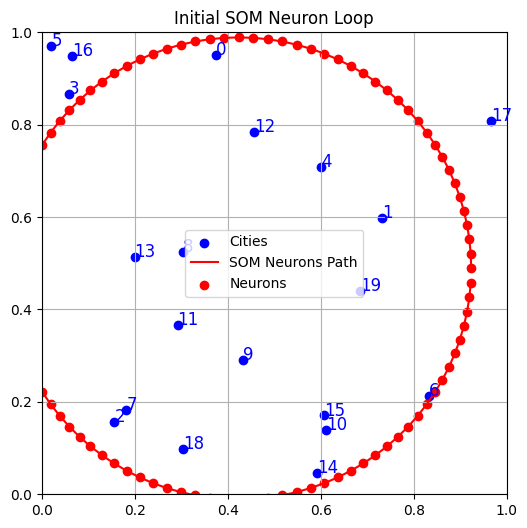

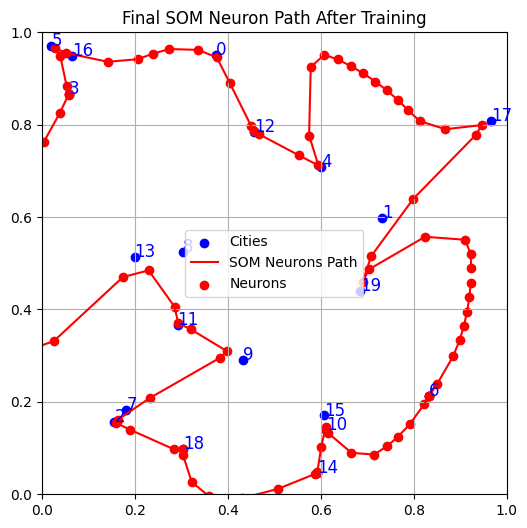

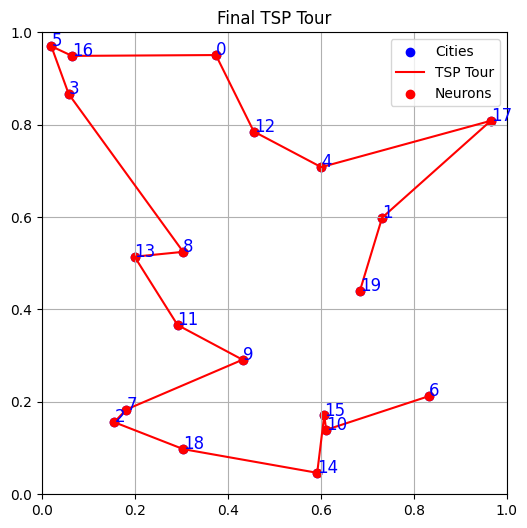

In [7]:
# Step 1: Generate random cities (TSP)
np.random.seed(42)
n_cities = 20
cities = np.random.rand(n_cities, 2)  # Random 2D coordinates for cities

# Step 2: Initialize SOM with a circular topology
n_neurons = 100  # Number of neurons in the SOM loop
som = MiniSom(x=n_neurons, y=1, input_len=2, sigma=1.0, learning_rate=0.8)

# Initialize the weights as a circular structure around the mean of the cities
angle = np.linspace(0, 2 * np.pi, n_neurons, endpoint=False)
center = np.mean(cities, axis=0)
radius = 0.5
som._weights = np.array([[center[0] + radius * np.cos(a), center[1] + radius * np.sin(a)] for a in angle]).reshape((n_neurons, 1, 2))

# Step 3: Function to plot the cities and the SOM neurons (tour)
def plot_tsp(cities, som_weights, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='Cities')
    plt.plot(som_weights[:, 0], som_weights[:, 1], 'r-', label='SOM Neurons Path')
    plt.scatter(som_weights[:, 0], som_weights[:, 1], c='red', label='Neurons')

    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=12, color='blue')

    plt.title(title)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot initial state (random neurons on a circular loop)
plot_tsp(cities, som.get_weights().reshape(n_neurons, 2), 'Initial SOM Neuron Loop')

# Step 4: Train the SOM (neurons adapt to form a TSP tour)
n_iterations = 100
initial_sigma = 1.0
initial_learning_rate = 0.8

for i in range(n_iterations):
    city = cities[np.random.randint(0, n_cities)]

    # Reduce neighborhood size and learning rate over time
    sigma = initial_sigma * np.exp(-i / n_iterations)  # Exponential decay
    learning_rate = initial_learning_rate * np.exp(-i / n_iterations)

    # Train SOM with the selected city and custom sigma/learning rate
    som.train(np.array([city]), 1)

# Plot final state (neurons forming an approximate tour)
plot_tsp(cities, som.get_weights().reshape(n_neurons, 2), 'Final SOM Neuron Path After Training')

# Step 5: Extract the order of the cities by finding the closest neuron for each city
def find_tour(cities, som_weights):
    tour = []
    for city in cities:
        distances = np.linalg.norm(som_weights - city, axis=1)
        tour.append(np.argmin(distances))
    return np.array(tour)

som_weights = som.get_weights().reshape(n_neurons, 2)
tour = find_tour(cities, som_weights)
sorted_cities = cities[np.argsort(tour)]

# Plot final tour (with ordered cities)
plt.figure(figsize=(6, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='Cities')
plt.plot(sorted_cities[:, 0], sorted_cities[:, 1], 'r-', label='TSP Tour')
plt.scatter(sorted_cities[:, 0], sorted_cities[:, 1], c='red', label='Neurons')

for i, city in enumerate(cities):
    plt.text(city[0], city[1], str(i), fontsize=12, color='blue')

plt.title('Final TSP Tour')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()


Now, let's apply SOM for image segmentation. Here, I choose descriptors which are concatenation of (RGB) vector and coordinate vector. Experiment with changes in results when weight coefficients are different.

<ipython-input-8-36f74d73528f>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', n_colors)  # Get a color map with 'n_clusters' distinct colors


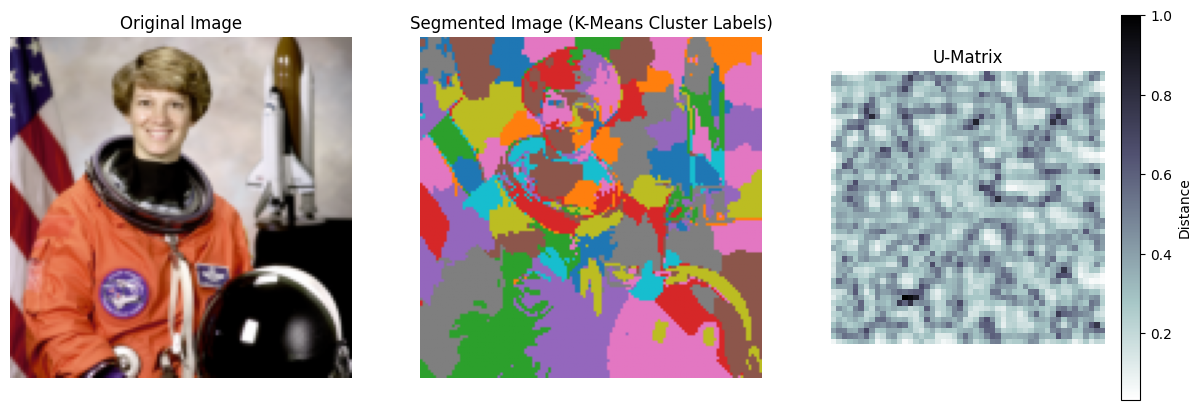

In [8]:
from skimage import data
from skimage.transform import resize
from matplotlib import cm

# Step 1: Load and preprocess the astronaut image (from scikit-image)
def load_image():
    img = data.astronaut()  # Load the astronaut image
    img = resize(img, (128, 128), anti_aliasing=True)  # Resize image for faster computation
    img_array = np.array(img)
    return img_array

# Load the image
image = load_image()
height, width, _ = image.shape

# Step 2: Normalize pixel values to [0, 1]
image_normalized = image / 255.0

# Step 3: Concatenate RGB with (x, y) position, scaled by alpha
alpha = 0.0001  # Normalization constant for (x, y) position
pixels = image_normalized.reshape(-1, 3)  # Flatten the image to have shape (n_pixels, 3) for RGB

# Create (x, y) position grid
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
x_coords = x_coords.flatten() * alpha
y_coords = y_coords.flatten() * alpha

# Concatenate RGB values with scaled (x, y) positions
pixels_with_position = np.column_stack((pixels, x_coords, y_coords))

# Step 4: Initialize and train the SOM
som_x = 50  # SOM grid size (adjust based on desired number of segments)
som_y = 50
som = MiniSom(x=som_x, y=som_y, input_len=5, sigma=1.0, learning_rate=0.5)  # Input_len is now 5 (RGB + x + y)

# Randomly initialize the weights
som.random_weights_init(pixels_with_position)

# Train the SOM
som.train_random(pixels_with_position, 10000)  # Train with 1000 iterations

# Step 5: Extract the SOM weights and apply K-Means clustering
def kmeans_on_som_weights(som, n_clusters):
    # Get the weights of the SOM neurons
    weights = som.get_weights().reshape(-1, 5)  # Reshape to 2D array (n_neurons, 5)

    # Apply K-Means clustering to the SOM weights
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(weights)

    return kmeans

# Define the number of desired clusters
n_clusters = 150
kmeans = kmeans_on_som_weights(som, n_clusters)

# Step 6: Segment the image using K-Means cluster labels
def segment_image_with_kmeans(som, pixels_with_position, image_shape, kmeans):
    labels = np.zeros(pixels_with_position.shape[0])

    # Assign each pixel to the cluster of its BMU
    for i, pixel in enumerate(pixels_with_position):
        bmu = som.winner(pixel)  # Get the BMU for the pixel
        bmu_index = bmu[0] * som_y + bmu[1]  # Convert 2D BMU index to 1D index
        labels[i] = kmeans.labels_[bmu_index]  # Assign the cluster label from K-Means

    # Create a color map to visualize the segments
    n_colors = n_clusters
    color_map = cm.get_cmap('tab10', n_colors)  # Get a color map with 'n_clusters' distinct colors

    # Map each cluster label to a color
    segmented_pixels = np.zeros((pixels_with_position.shape[0], 3))
    for i in range(len(labels)):
        segmented_pixels[i] = color_map(int(labels[i]))[:3]  # Assign color based on cluster label

    # Reshape the segmented pixels back to the original image shape
    segmented_image = segmented_pixels.reshape(image_shape)
    return segmented_image

segmented_image = segment_image_with_kmeans(som, pixels_with_position, image.shape, kmeans)

# Step 7: Plot the original, segmented images, and the U-Matrix
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Segmented Image (K-Means Cluster Labels)
plt.subplot(1, 3, 2)
plt.title('Segmented Image (K-Means Cluster Labels)')
plt.imshow(segmented_image)
plt.axis('off')

# U-Matrix Visualization
plt.subplot(1, 3, 3)
plt.title('U-Matrix')
u_matrix = som.distance_map()  # Get the U-Matrix (distance map)
plt.imshow(u_matrix.T, cmap='bone_r')  # Transpose to match the correct orientation
plt.colorbar(label='Distance')
plt.axis('off')

plt.show()
